### Comments
***This problem can be solved using sliding window approach***

* We keep increasing the window and calculating the size untils k number of zeros are found.
* This part where I got initially got wrong was you dont reset the window back to where you found the first zero but you set p1 = first_zero +1. As you have made the largest combo of 1's in that window whilst including that zero.
* Edge case but if you get k=0 you need to increment p2 and p1 until you find the next 1.

### Complexity:

***Time***:O(n)

***Space***: O(k)

* As k number of zeros positions could be potentially kept.

In [ ]:
from collections import deque


class Solution:
    def longestOnes(self, nums: list[int], k: int) -> int:

        size = len(nums)
        max_size = 0
        p1, p2 = 0, 0

        zero_loc = deque()

        while p2 < size:
            if nums[p2] == 1 or len(zero_loc) < k:
                if nums[p2] == 0:
                    zero_loc.append(p2)
                count = p2 - p1 + 1
                max_size = count if (count > max_size) else max_size
                p2 += 1
            else:

                if len(zero_loc) > 0:
                    p1 = zero_loc.popleft() + 1
                else:
                    while p2 < size and nums[p2] != 1:
                        p2 += 1
                    p1 = p2

        return max_size


s = Solution()


# Example 1:

# Input: nums = [1,1,1,0,0,0,1,1,1,1,0], k = 2
# Output: 6
# Explanation: [1,1,1,0,0,1,1,1,1,1,1]
# Bolded numbers were flipped from 0 to 1. The longest subarray is underlined.


print(s.longestOnes([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], 2))
# Example 2:

# Input: nums = [0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1], k = 3
# Output: 10
# Explanation: [0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1]
# Bolded numbers were flipped from 0 to 1. The longest subarray is underlined.

print(s.longestOnes([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], 3))


print(s.longestOnes([0, 0, 1, 1, 1, 0, 0], 0))

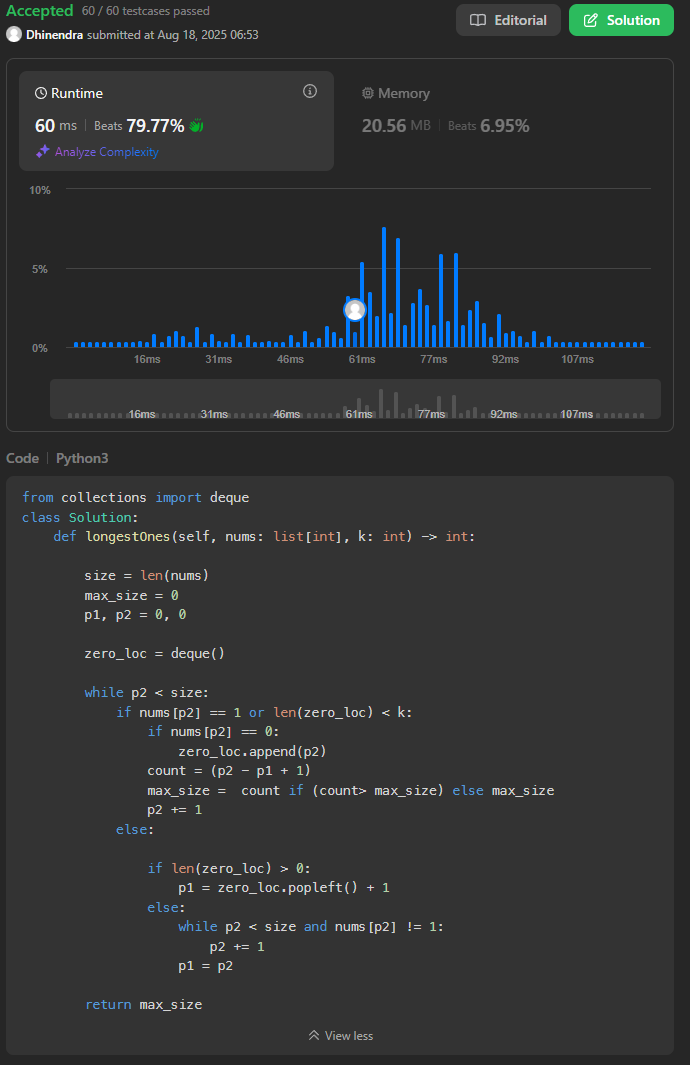

### Community References:


* Interesting approach from the community is:


```
class Solution:
    def longestOnes(self, nums: List[int], k: int) -> int:
        left = 0
        curr = 0
        ans = 0
        for right in range(len(nums)):
            if nums[right] == 0:
                curr += 1

            while curr > k:
                if nums[left] == 0:
                    curr -= 1
                left += 1
            
            ans = max(ans, right - left + 1)

        return ans
```

* Which is similiar to my approach but here we dont keep track of where we found zero rather we increment left(p1) until the number of zeros is <k

* This yeilds better space complexity as we dont keep the zeros.

* Could be optimized more for time complexity by using a queue for the zeros. As k will be constant.


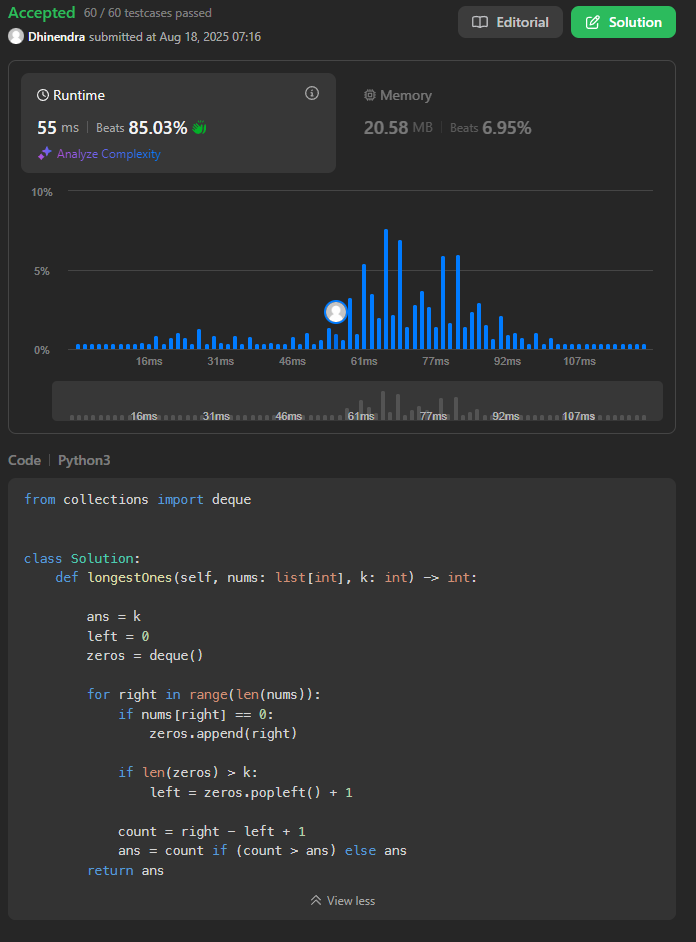

### Complexity:

***Time***:O(n)

***Space***: O(1)

